# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

В этом проекте будет необходимо исследовать данные на пропуски, найти закономерности между значениями различных параметров, исследовать аномальные значения и представить результаты в виде графиков для наглядного анализа.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Загрузим необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Загрузим файл с данными:

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv')
except FileNotFoundError as ex:
    print('Проверьте путь к файлу!', 'Текст ошибки:', ex, sep='\n')

Посмотрим общую информацию по загруженным данным:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB


Судя по всему неправильно указан разделитель csv-файла:

In [4]:
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Загрузим данные, указав правильный разделитель:

In [5]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

1. Загружены данные с указанием разделителя по знаку табуляции.
2. Данные в столбцах first_day_exposition необходимо будет привести к виду dataframe.
3. Данные в некоторых столбцах далее приведем к типу int, так как, например, номер этажа - целое число.
4. Загруженные данные имеют множество пропусков по разным столбцам, а столбцы имеют различные типы данных.

## Шаг 2. Предобработка данных

### 2.1 Быстрый анализ данных

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Из быстрого анализа с помощью describe видно, что:
- в стобце rooms есть значения равные 0. Похоже, что это студии (проверить тип в studio).
- в столбце floors_total есть строки со значением = 1 м, в столбце living_area - 2 м, kitchen_area - 1.3 м. Маловероятно, что в  квартире с хоть одним из этих параметров можно жить (возможно, ошибочно занесенные данные).
- есть квартира с высотой потолка 100 метров. Это хорошая квартира, жаль, что вымышленная.
- есть квартира (или квартиры) с расстоянием до аэропорта 0 (!?). Возможно, квартира прямо в аэропорту расположена))

### 2.2 Исследование пропусков

Для корректного заполнения пропусков исследуем каждый столбец с пропусками.

#### Столбец ceiling_height (высота потолков)

Заполним заначения в ceiling_height значением медианы из за больших отклонений в 1 и 4 квартиле:

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#### Столбец floors_total (всего этажей в доме)

Так как для ответа на один из вопросов нужно указать зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом и по другим данным из таблицы выявить количество этажей в доме не предоставляется возможным, пропущенные значения не будут учитываться при построении графиков, поэтому пока оставим их как есть:

In [9]:
print('Всего nan значений в floors_total {}'.format(data[data['floors_total'].isna()].shape[0]))

Всего nan значений в floors_total 86


#### Столбец living_area (жилая площадь)

Тут сложнее. Чтобы правильно заполнить пропуски, я возьму медиану по группам в зависимости от количества комнат и подставлю соответствующие значения на место пропусков:

In [10]:
# создадим функцию, которая будет помогать заполнять пропущенные значения в зависимости от aggfunc 
# значениям из других колонок для строк, не содержащих nan значения
def extra_fillna(colnan, colname, aggfunc='mean'):
    #colnan - столбец со значениями nan
    # colname - столбец, по которому делаем сводную таблицу значений из colnan без значений nan
    # создадим требуемую сводную таблицу
    data_piv = data[~data[colnan].isna()].pivot_table(index=colname, values=colnan, aggfunc=aggfunc)
    # пройдемся циклом по всем значениям в исходных данных со значениями nan в colnan и подставим
    # соответствующие значения из сводной таблицы
    for i in data[data[colnan].isna()].index:
        data.loc[i, colnan] = data_piv.loc[data.loc[i, colname], colnan]

Для начала посмотрим на значения количества комнат:

In [11]:
data.rooms.value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Видно, что есть квартиры с количеством комнат равным 0. Что это за квартиры?

In [12]:
data.query('rooms == 0')['total_area'].describe()

count    197.000000
mean      29.279746
std       25.855264
min       15.500000
25%       24.050000
50%       26.050000
75%       28.400000
max      371.000000
Name: total_area, dtype: float64

Большинство квартир с площадью < 30 кв.м. (с 371 кв.м. разберемся позже). Скорее всего это студии, заполним значения, равные 0 в rooms единицами:

In [13]:
data.loc[data['rooms'] == 0, 'rooms'] = 1

Вызовем нашу функцию для замены nan значений в living_area. Сводная таблица будет создана для средних значений жилой площади в зависимости от количества комнат:

In [14]:
extra_fillna('living_area', 'rooms')

In [15]:
# напишем функцию для самопроверки, принимающей в качестве аргумента наименование столбца и выводящую количество пропусков 
# в этом столбце
def print_nan(colname):
    print('Количество пропусков в {} равно {}'.format(colname, data[colname].isnull().sum()))

In [16]:
# самопроверимся
print_nan('living_area')

Количество пропусков в living_area равно 0


#### Столбец is_apartment (апартаменты (булев тип))

In [17]:
# посмотрим на уникальный значения в столбце
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Посчитаем сколько всего пропусков:

In [18]:
print_nan('is_apartment')

Количество пропусков в is_apartment равно 20924


Слишком много пропусков, удалять строки нельзя, а то ничего не останется. Можно было бы заполнить пропуски на 'не указан', но тогда будет больше потребляться памяти для хранения строкового объекта. Так как эта информация в конечном итоге не так уж и необходима и большая часть квартир не апартаменты, то заполним nan значением False:

In [19]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [20]:
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [21]:
print_nan('is_apartment')

Количество пропусков в is_apartment равно 0


#### Столбец kitchen_area (площадь кухни)

In [22]:
print_nan('kitchen_area')

Количество пропусков в kitchen_area равно 2278


Площадь кухни обычно может расти с числом комнат в квартире. Заменим неизвестные значения площадей кухонь средними значениями в зависимости от количества комнат.

Воспользуемся ранее созданой функцией:

In [23]:
extra_fillna('kitchen_area', 'rooms')

In [24]:
print_nan('kitchen_area')

Количество пропусков в kitchen_area равно 0


#### Столбец balcony (количество балконов)

Воспользуемся подсказкой из описания задания проекта и заполним пропуски на 0:

In [25]:
data['balcony'] = data['balcony'].fillna(0)

#### Столбец locality_name (наименование наленного пункта)

In [26]:
#посмотрим количество пропусков в locality_name
print_nan('locality_name')

Количество пропусков в locality_name равно 49


Значения nan в locality_name оставляем не измененными, так как данные в других столбцах не дают представление о локации (если только взять расстояние до аэропорта)

#### Столбец airports_nearest (расстояние до аэропорта)

Заполним пропуски медианами для определенных населенных пунктов. Nan значения в locality_name пока не учитываем.

In [27]:
print_nan('airports_nearest')

Количество пропусков в airports_nearest равно 5542


In [28]:
# создадим функцию для решения подобных проблем в будущем
def extra_fillna_dist(colna, colname, aggf='mean'):
    # создадим сводную таблицу из входных данных
    data_piv = data[~data[colna].isna() & ~data[colname].isna()].pivot_table(index=colname, values=colna, aggfunc=aggf)
    # подставим значения из сводной таблицы на места пропусков
    for i in data_piv.index:
        data.loc[data[colna].isnull() & (data[colname] == i), colna] = data_piv.loc[i][0]

Вызовем созданную функцию для заполнения нужных пропусков:

In [29]:
extra_fillna_dist('airports_nearest', 'locality_name', aggf='median')

In [30]:
print_nan('airports_nearest')

Количество пропусков в airports_nearest равно 5394


Немного заполнили. Остально оставим так, как есть.

#### Столбцы cityCenters_nearest, parks_nearest, ponds_nearest

In [31]:
for i in ('cityCenters_nearest', 'parks_nearest', 'ponds_nearest'):
    print_nan(i)

Количество пропусков в cityCenters_nearest равно 5519
Количество пропусков в parks_nearest равно 15620
Количество пропусков в ponds_nearest равно 14589


Воспользуемся ранее созданной функцией, чтобы заполнить все пропуски медианами, какие возможно:

In [32]:
for i in ('cityCenters_nearest', 'parks_nearest', 'ponds_nearest'):
    extra_fillna_dist(i, 'locality_name', aggf='median')

In [33]:
for i in ('cityCenters_nearest', 'parks_nearest', 'ponds_nearest'):
    print_nan(i)

Количество пропусков в cityCenters_nearest равно 5394
Количество пропусков в parks_nearest равно 6032
Количество пропусков в ponds_nearest равно 5518


Также оставим оставшиеся пропуски.

#### Колонки ponds_around3000, parks_around3000 и days_exposition

Оставим значения в этих колонках как есть, так как расстояния до парка и водоема может меняться в очень широких пределах.

### 2.3 Приведение к правильным типам

Замена типа данных может ускорить работу с датасетом, так как будет требоваться меньше оперативной памяти для хранения датасета. Также будут быстрее проводиться вычисления и операции со значениями ячеек с измененным типом (либо вообще операции станут корректны в случае с датой и временем).

Для начала посмотрим, в каких столбцах сколько nan значений:

In [34]:
for i in data.columns:
    print_nan(i)

Количество пропусков в total_images равно 0
Количество пропусков в last_price равно 0
Количество пропусков в total_area равно 0
Количество пропусков в first_day_exposition равно 0
Количество пропусков в rooms равно 0
Количество пропусков в ceiling_height равно 0
Количество пропусков в floors_total равно 86
Количество пропусков в living_area равно 0
Количество пропусков в floor равно 0
Количество пропусков в is_apartment равно 0
Количество пропусков в studio равно 0
Количество пропусков в open_plan равно 0
Количество пропусков в kitchen_area равно 0
Количество пропусков в balcony равно 0
Количество пропусков в locality_name равно 49
Количество пропусков в airports_nearest равно 5394
Количество пропусков в cityCenters_nearest равно 5394
Количество пропусков в parks_around3000 равно 5518
Количество пропусков в parks_nearest равно 6032
Количество пропусков в ponds_around3000 равно 5518
Количество пропусков в ponds_nearest равно 5518
Количество пропусков в days_exposition равно 3181


__Заменим типы данных в колонках без пропусков:__

Приведем к типу int в столбцах 'last_price' и 'balcony', так как цена достаточно велика, по сравнению с дробной частью, а количество балконов - это целое число.

In [35]:
for i in ('last_price', 'balcony'):
    data[i] = data[i].astype('int')

__Приведем дату first_day_exposition к типу datetime__

In [36]:
data['first_day_exposition'].head(3)

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
Name: first_day_exposition, dtype: object

Время всегда равно 00:00:00. Не будем учитывать время при ковертировании формата:

In [37]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18305 non-null float64
cityCenters_nearest     18305 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           17667 non-null float64
ponds_aroun

Все возможные преобразования выполнены. Пора найти дубликаты (если они есть).

### 2.4 Поиск дубликатов

In [39]:
data.duplicated().value_counts()

False    23699
dtype: int64

Дублированных строк в таблице не обнаружено.

### Выводы 

1. В представленной таблице были найдены и заменены пропуски в тех случаях, когда это было возможно сделать. Пропуски, в основном, были заменены медианными значениями сводных таблиц по определенным выявленным зависимостям от других столбцов.
2. Пропуски могли появиться из-за несогласованого формата выгрузки из базы данных, из-за отсутствия самих данных (источник их не сообщил), ошибки занесения данных в БД.
3. Цена и количество балконов были приведены к целочисленному типу.
4. Дата была приведена к типу datetime без учета времени, так как время во всех строках одинаково и равно 00:00:00.

### Шаг 3. Посчитайте и добавьте в таблицу

#### 3.1 Цена квадратного метра

In [40]:
# вычислим цену квадратного метра, округлим до 2 знаков
data['price_sq_m'] = (data['last_price'] / data['total_area']).round(2)

#### 3.2 Добавление в таблицу дня недели, месяца и года публикации.

In [41]:
data['day_of_week'] = data.first_day_exposition.dt.strftime('%A') # день недели прописью
data['month'] = data.first_day_exposition.dt.strftime('%B')
data['year'] = data.first_day_exposition.dt.year

Так как населенные пункты у нас прописаны на русском языке, предположим что значения в колонках с днем и месяцем тоже должны быть на русском. Произведем необходимые преобразования, создав словари соответствия английских наименований русским:

In [42]:
# создадим функцию, с помощью которой будем менять записи с английского на русский
def convert_en_ru(row, en_ru_dict):
    for key, item in en_ru_dict.items():
        if row == key:
            return item
        
# создадим словарь с названиями месяцев
dict_month = {'January': 'Январь', 
              'February': 'Февраль', 
              'March': 'Март', 
              'April': 'Апрель', 
              'May': 'Май', 
              'June': 'Июнь', 
              'July': 'Июль', 
              'August': 'Август',  
              'September': 'Сентябрь', 
              'October': 'Октябрь', 
              'November': 'Ноябрь', 
              'December': 'Декабрь'}

# словарь с названиями дней недели
dict_week_day = {'Monday': 'Понедельник', 
                 'Tuesday': 'Вторник', 
                 'Wednesday': 'Среда', 
                 'Thursday': 'Четверг', 
                 'Friday': 'Пятница', 
                 'Saturday': 'Суббота', 
                 'Sunday': 'Воскресенье'}

# изменим на русский названия в столбцах с днем недели и месяца
for i in zip(('day_of_week', 'month'), (dict_week_day, dict_month)):
    data[i[0]] = data[i[0]].apply(convert_en_ru, en_ru_dict=i[1])

In [43]:
data[['day_of_week', 'month', 'year']].head()

,day_of_week,month,year
0,Четверг,Март,2019
1,Вторник,Декабрь,2018
2,Четверг,Август,2015
3,Пятница,Июль,2015
4,Вторник,Июнь,2018


Руссификация прошла успешно. Но по-хорошему, сейчас объем занимаемой памяти будет больше, так как в столбцах с днем и месяцем хранятся объекты типа 'object'. Если бы было необходимо оптимизировать потребления памяти, было бы целесообразно привести данные в этих колонках к типу 'category'.

#### 3.3 Классификация этажей квартиры

In [44]:
# напишем функцию, которая будет сравнивать значения в floors_total и floor
def fl_group(row):
    if (row[6] - row[8]) == 0:
        return 'последний'
    elif row[8] == 1:
        return 'первый'
    else:
        return 'другой'
    
data['floor_group'] = data.apply(fl_group, axis=1)

#### 3.4 Соотношение жилой и общей площади, площади кухни к общей

In [45]:
data['liv_to_total_area'] = (data.living_area / data.total_area) # соотношение жилой площади к общей
data['kit_to_total_area'] = (data.kitchen_area / data.total_area) # соотношение площади кухни к общей

Посмотрим на первые 10 строк добавленных столбцов:

In [46]:
data[data.columns[-7:]].head(10)

,price_sq_m,day_of_week,month,year,floor_group,liv_to_total_area,kit_to_total_area
0,120370.37,Четверг,Март,2019,другой,0.472222,0.231481
1,82920.79,Вторник,Декабрь,2018,первый,0.460396,0.272277
2,92785.71,Четверг,Август,2015,другой,0.612500,0.148214
3,408176.10,Пятница,Июль,2015,другой,0.298037,0.071123
4,100000.00,Вторник,Июнь,2018,другой,0.320000,0.410000
5,95065.79,Понедельник,Сентябрь,2018,другой,0.473684,0.299342
6,99195.71,Четверг,Ноябрь,2017,другой,0.284182,0.386059
7,110544.69,Четверг,Апрель,2019,другой,0.443252,0.263966
8,87454.76,Среда,Май,2018,другой,0.465320,0.265682
9,88524.59,Воскресенье,Февраль,2017,другой,0.714754,0.106557


Вывод: в таблицу добавлены дополнительные столбцы с параметрами, необходимыми для дальнейшего анализа.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### 4.1 Площадь, цена, число комнат, высота потолков

Построим гистограммы и посмотрим на распределение:

In [47]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

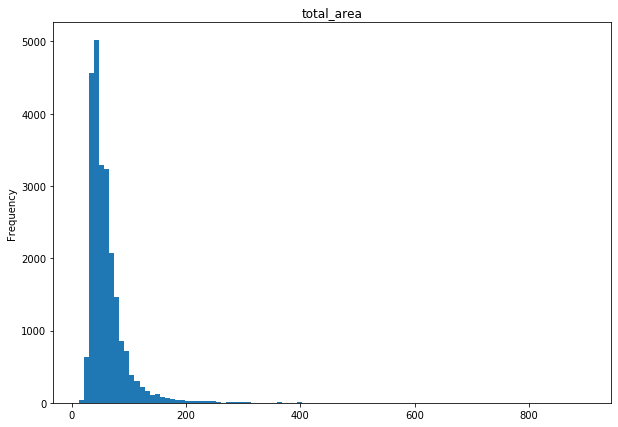

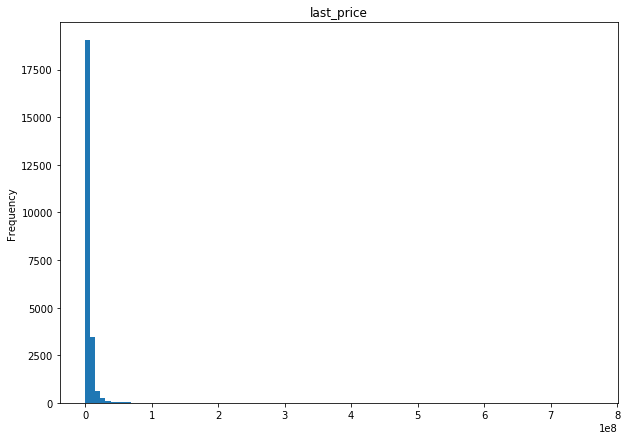

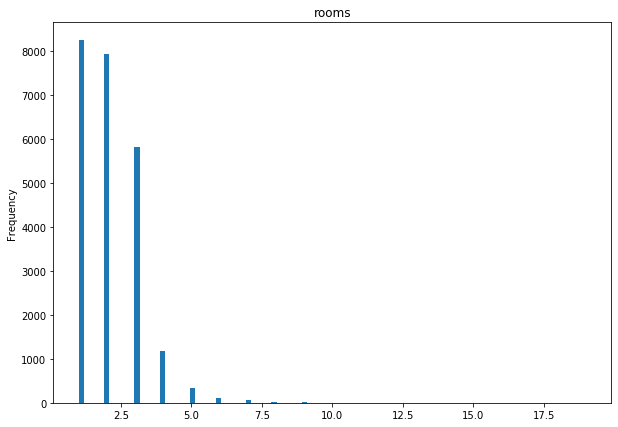

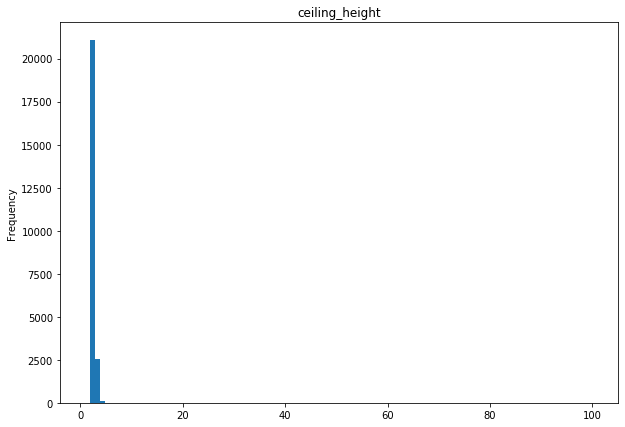

In [48]:
for i in ('total_area', 'last_price', 'rooms', 'ceiling_height'):
    data[i].plot(kind='hist', figsize=(10, 7), title=i, bins=100)
    plt.show()

Посмотрим на срезы этих гистограмм, чтобы выявить области повышенной плотности значений:

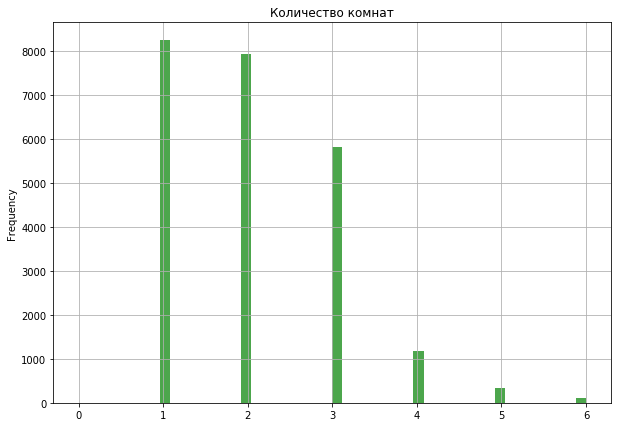

In [49]:
data['rooms'].plot(kind='hist', figsize=(10, 7), bins=50, title='Количество комнат', range=(0, 6), grid=True, facecolor='g', alpha=0.7);

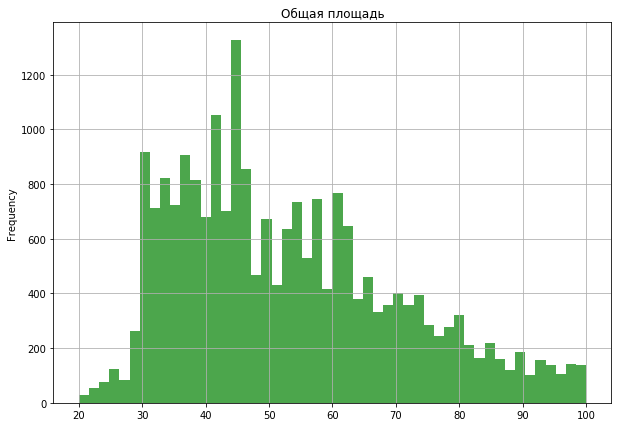

In [50]:
data['total_area'].plot(kind='hist', figsize=(10, 7), bins=50, title='Общая площадь', range=(20, 100), grid=True, facecolor='g', alpha=0.7);

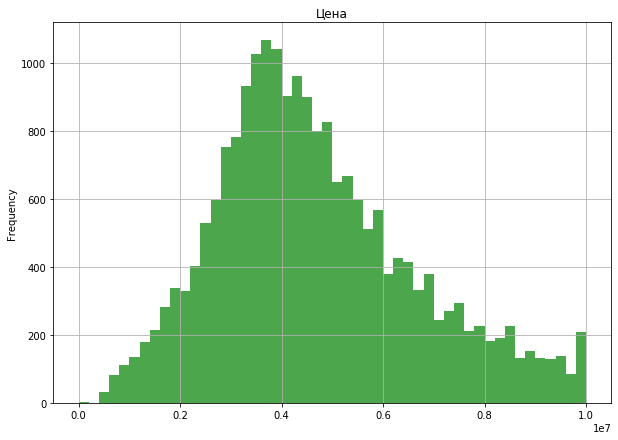

In [51]:
data['last_price'].plot(kind='hist', figsize=(10, 7), bins=50, title='Цена', range=(0, 10**7), grid=True, facecolor='g', alpha=0.7);

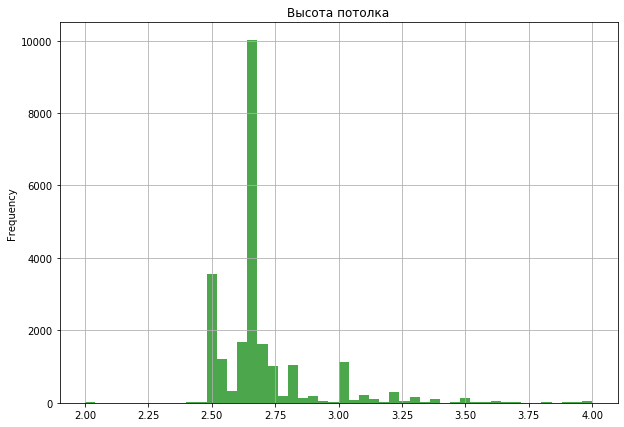

In [52]:
data['ceiling_height'].plot(kind='hist', figsize=(10, 7), bins=50, title='Высота потолка', range=(2, 4), grid=True, facecolor='g', alpha=0.7);

Из полученных гистограмм видно, что основная плотность значений сосредоточена в левой части графика, но так как по оси абцисс значения уходят далеко вправо, значит есть аномальные выбросы, частота которых крайне мала.

Также можно сделать следующие выводы:
1. Большая часть квартир с количеством комнат от 1 до 3.
2. Большая часть квартир имеет площадь от 35 до 60 кв.м.
3. Квартиры в основном стоят от 2 до 6 млн.
4. Большое количество квартир с высотами потолков от 2,5 до 2,7 м.

#### 4.2 Время продажи квартиры.

Изучим данные в столбце days_exposition и построим гистограмму.

In [53]:
print('Среднее время продажи квартиры: {}'.format(data.days_exposition.mean().round().astype(int)))

Среднее время продажи квартиры: 181


In [54]:
print('Медианное время продажи квартиры: {}'.format(data.days_exposition.median().round().astype(int)))

Медианное время продажи квартиры: 95


Видно разницу в 2 раза. Построим гистограмму:

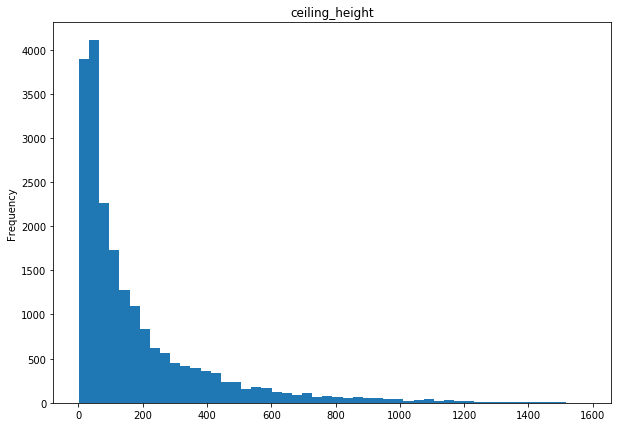

In [55]:
data['days_exposition'].plot(kind='hist', figsize=(10, 7), title=i, bins=50);

Плохо видно. Исследуем части графика, чтоб ответить на вопросы:

___Сколько обычно происходит продажа?___

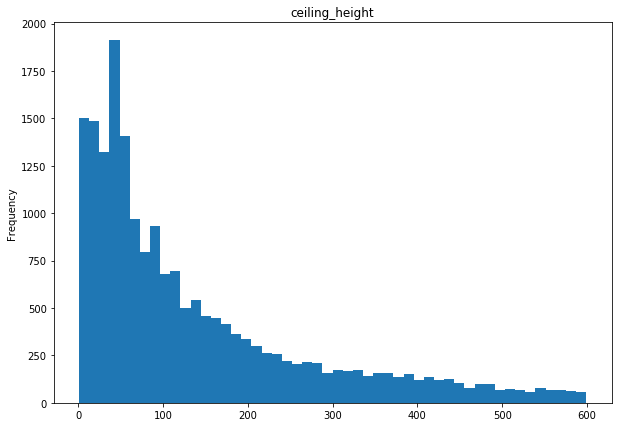

In [56]:
data.query('days_exposition < 600')['days_exposition'].plot(kind='hist', figsize=(10, 7), title=i, bins=50);

Вывод: _Обычно продажа занимает до 200 дней в большенстве случаев._

___Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?___

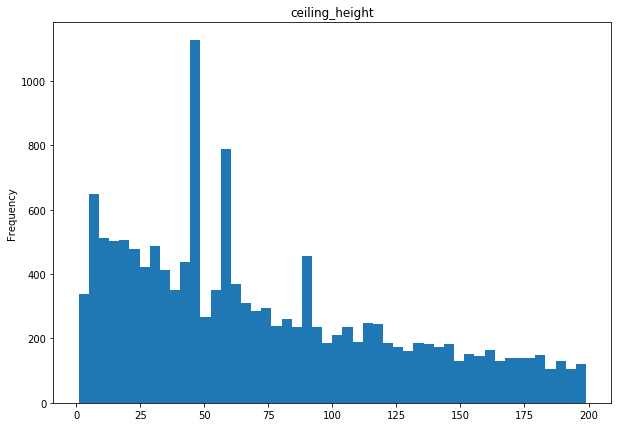

In [57]:
data.query('days_exposition < 200')['days_exposition'].plot(kind='hist', figsize=(10, 7), title=i, bins=50);

Вывод: _Можно считать, что продажа прошла очень быстро, если длилась менее 30 дней._

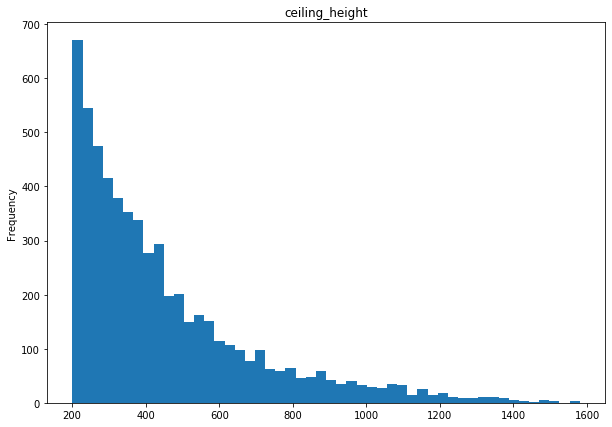

In [58]:
data.query('days_exposition > 200')['days_exposition'].plot(kind='hist', figsize=(10, 7), title=i, bins=50);

Вывод: _Можно считать, что продажа прошла необычно долго, если длилась более 1200 дней._

#### 4.3 Обработка редких и выбивающихся значений

Проанализируем значения в rooms

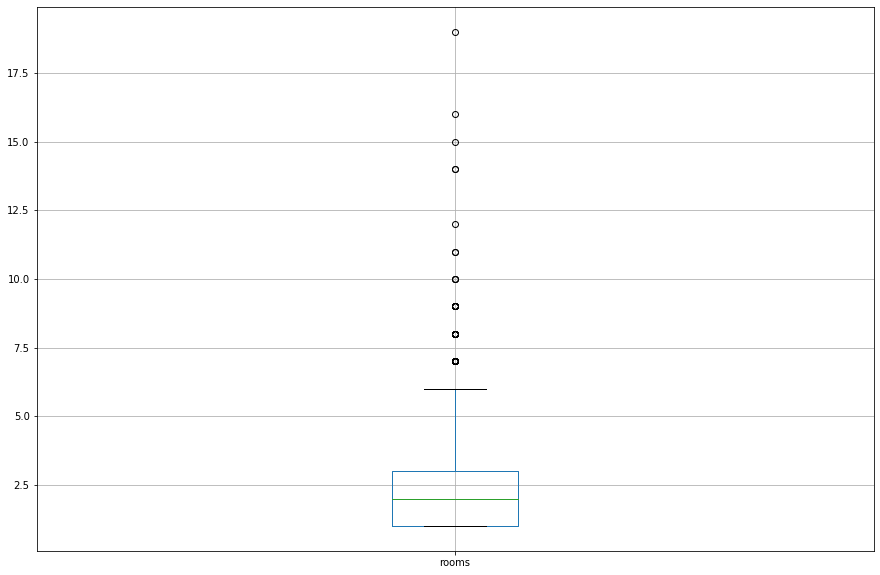

In [59]:
data.boxplot('rooms', figsize=(15, 10));

Значения количества комнат более 6 не входят в верхний 'ус' диаграммы распределения, поэтому отбросим их.

In [60]:
data = data.query('rooms <= 6')

__Проанализируем высоту потолков, общее количества этажей.__

In [61]:
# создадим функцию, которая будет помогать строить графики распределения
def plot_box(colname):    
    data.boxplot(colname, figsize=(15, 10));

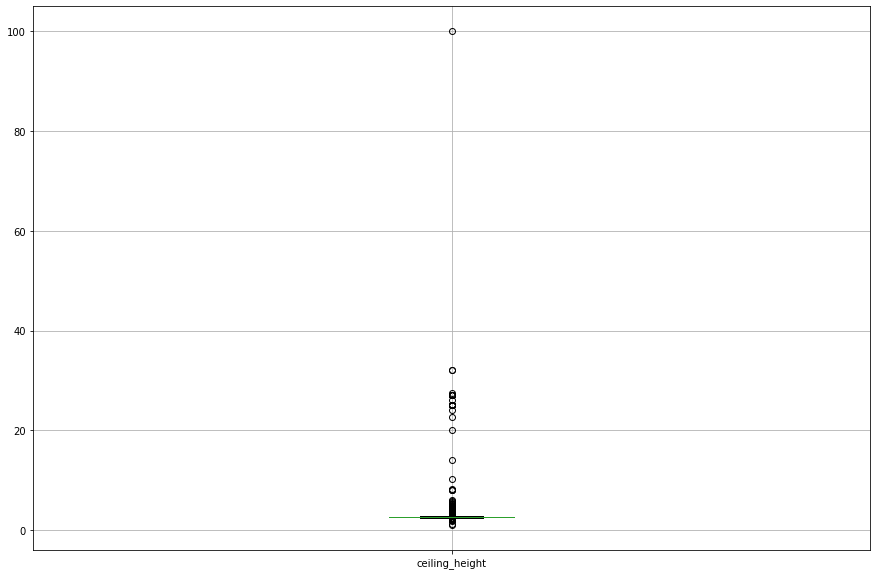

In [62]:
# построим графики для ceiling_height
plot_box('ceiling_height')

Для выявления выбросов посмотрим на срез данных:

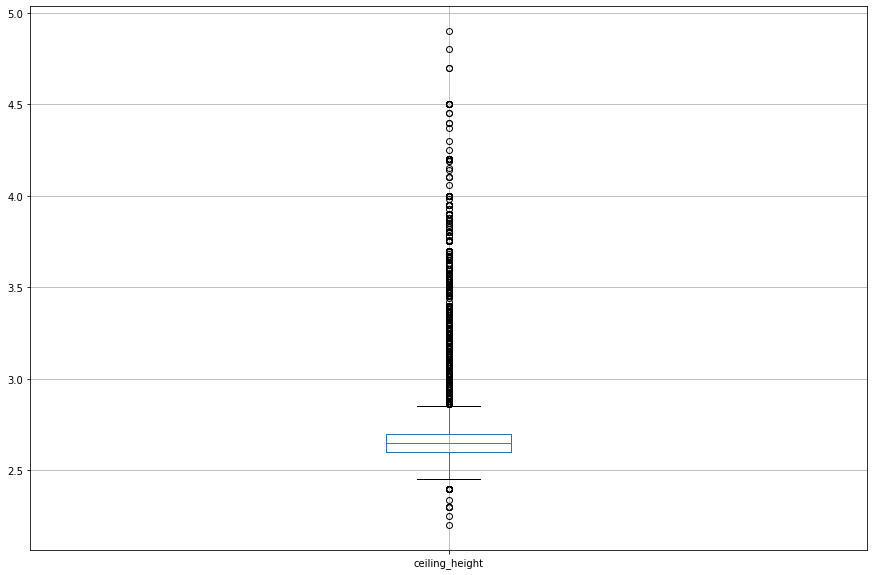

In [63]:
data.query('2 < ceiling_height < 5').boxplot('ceiling_height', figsize=(15, 10));

Если учесть, что в Санкт-Петербуреге есть множество коммунальных квартир с высотой потолков порядка 4 метров, думаю, что эти значения можно оставить. Также нужно отсечь все значения менее 2,4 м.

In [64]:
data = data.query('2.4 < ceiling_height < 4')

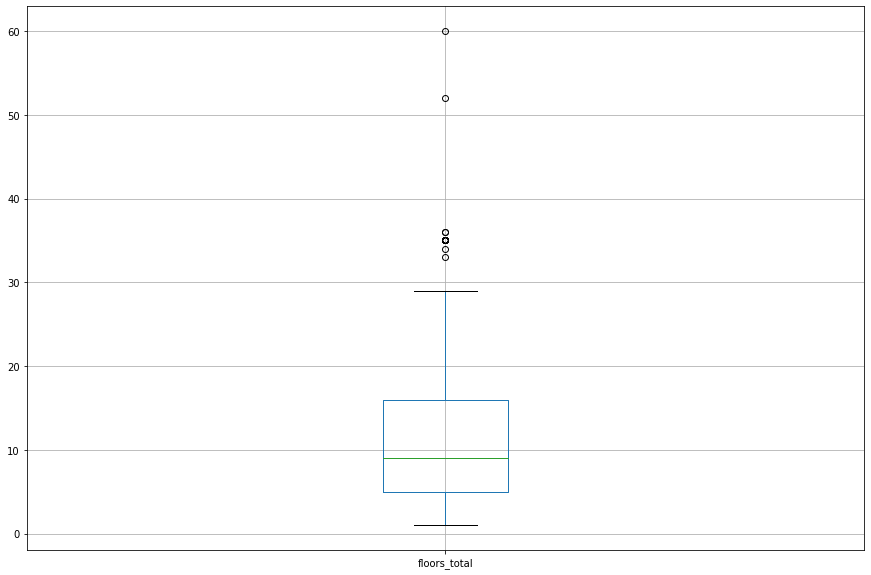

In [65]:
# построим графики для floors_total
plot_box('floors_total')

In [66]:
# Отсечем значения выше 30
data = data.query('floors_total <= 30')

__Проанализируем площадь квартиры, площадь кухни и количество балконов.__

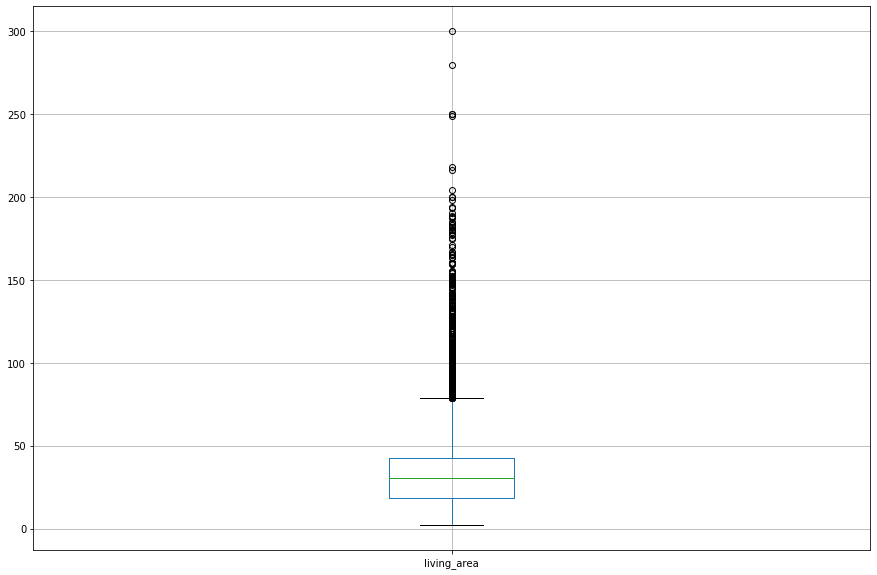

In [67]:
plot_box('living_area')

In [68]:
# оставим значения площади квартиры не более 80 кв.м., так как такие квартиры составляют подавляющее большенство
data = data.query('living_area <= 80')

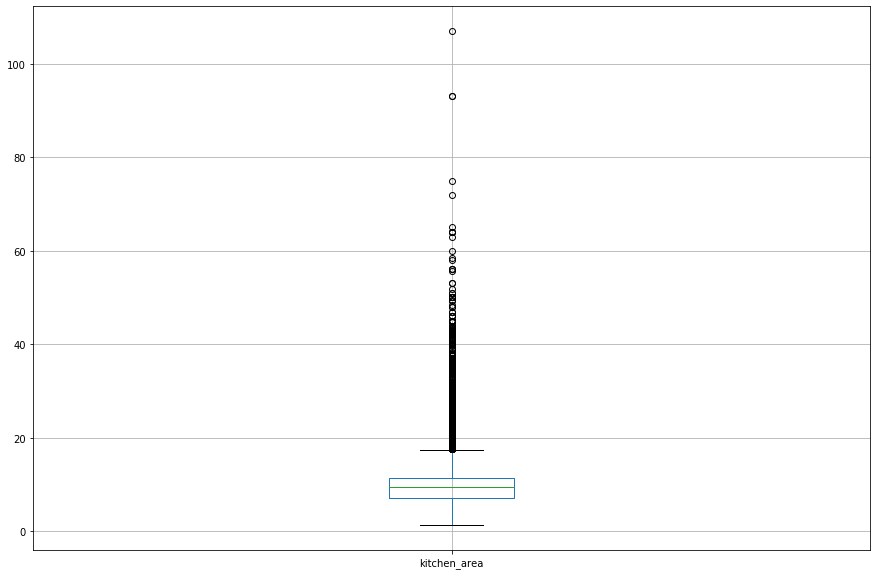

In [69]:
# построим графики для kitchen_area
plot_box('kitchen_area')

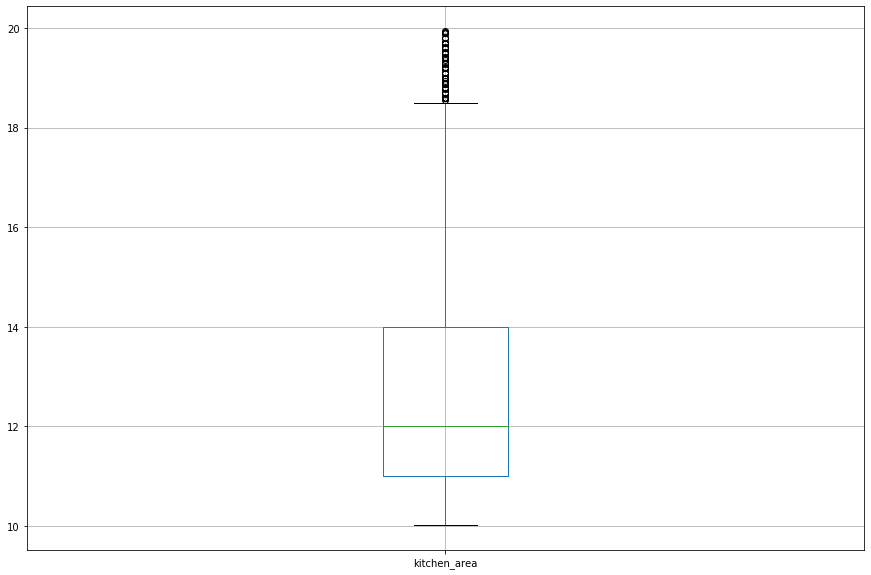

In [70]:
# сделаем срез
data.query('10 < kitchen_area < 20').boxplot('kitchen_area', figsize=(15, 10));

In [71]:
# удалим значения площадей кухонь более 18,5 кв.м.
data = data.query('kitchen_area <= 18.5')

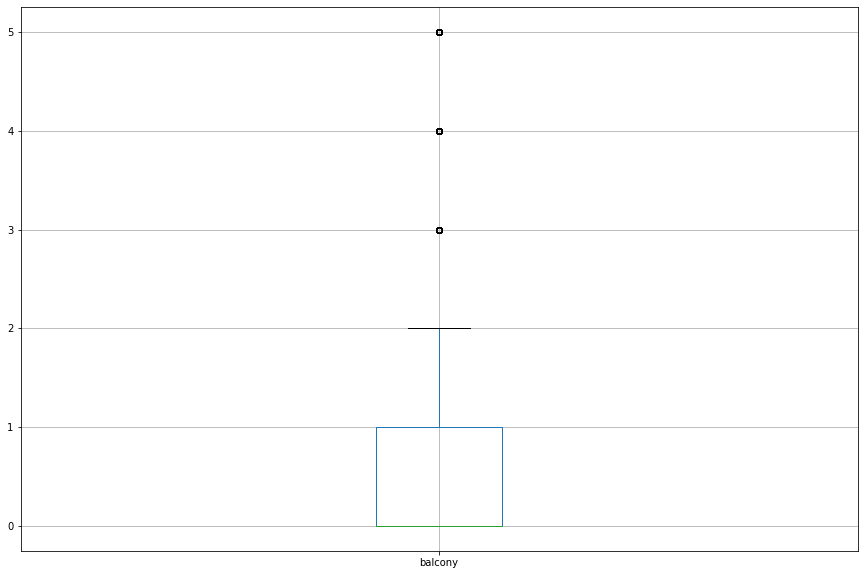

In [72]:
plot_box('balcony')

In [73]:
# отбросим все значения больше 2
data = data.query('balcony <= 2')

__Проверим, какие еще данные можно исследовать на аномальные значения__

In [74]:
data[data.columns[:15]].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony
count,21236.000000,2.123600e+04,21236.000000,21236.000000,21236.000000,21236.000000,21236.000000,21236.000000,21236.000000,21236.000000
mean,9.702015,5.225299e+06,54.045379,1.948625,2.674903,10.708467,31.016468,5.851997,9.406504,0.508900
std,5.560331,3.742806e+06,21.115368,0.895978,0.174578,6.551465,13.694033,4.847502,2.838972,0.758138
min,0.000000,4.300000e+05,12.000000,1.000000,2.450000,1.000000,2.000000,1.000000,1.300000,0.000000
25%,6.000000,3.300000e+06,39.000000,1.000000,2.600000,5.000000,18.000000,2.000000,7.000000,0.000000
50%,9.000000,4.400000e+06,49.200000,2.000000,2.650000,9.000000,29.875000,4.000000,9.300000,0.000000
75%,14.000000,6.100000e+06,64.100000,3.000000,2.700000,16.000000,40.000000,8.000000,11.000000,1.000000
max,39.000000,1.500000e+08,500.000000,6.000000,3.980000,29.000000,80.000000,27.000000,18.500000,2.000000


In [75]:
data[data.columns[15:]].describe()

,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,year,liv_to_total_area,kit_to_total_area
count,16122.000000,16122.000000,16017.000000,15517.000000,16017.000000,16012.000000,18581.000000,21236.000000,21236.000000,21236.000000,21236.000000
mean,28939.560414,14739.144089,0.575201,477.016820,0.724043,514.311985,174.758786,94984.421626,2017.379638,0.567946,0.189132
std,12944.575341,8563.895577,0.776773,231.390084,0.903646,196.648679,213.964175,36562.404240,1.024709,0.107545,0.069281
min,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000,7962.960000,2014.000000,0.021583,0.019328
25%,18186.500000,10251.000000,0.000000,433.000000,0.000000,474.000000,44.000000,75409.840000,2017.000000,0.497696,0.136364
50%,26943.000000,13385.000000,0.000000,460.000000,0.000000,503.000000,92.000000,93548.390000,2017.000000,0.569328,0.176163
75%,37499.000000,16582.000000,1.000000,460.000000,1.000000,564.000000,221.000000,111413.662500,2018.000000,0.638905,0.233333
max,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1553.000000,848484.850000,2019.000000,1.594839,0.795843


Отношение жилой зоны к общей зоне никогда не сможет быть больше 1, да и площадь кухни 80 % от общей жилой площади маловероятна. Посмотрим на их диаграммы распределения:

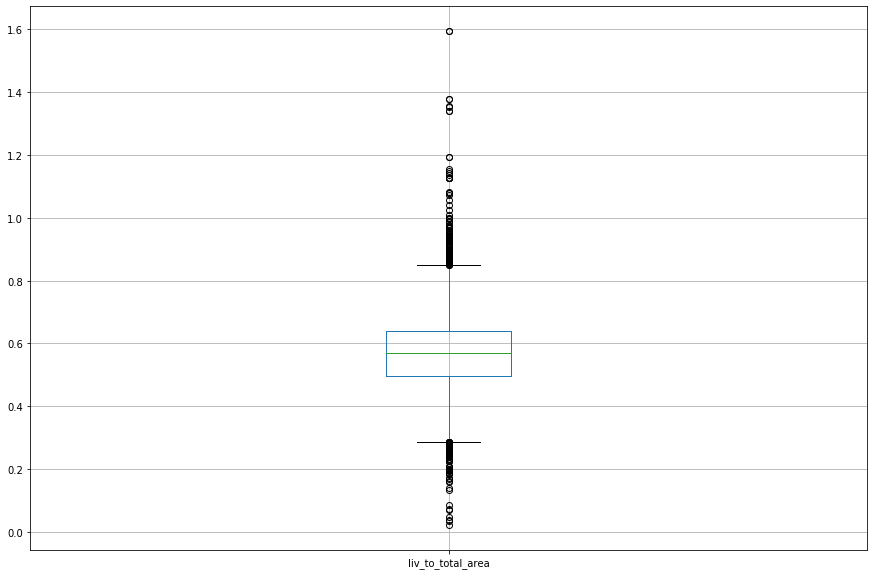

In [76]:
plot_box('liv_to_total_area')

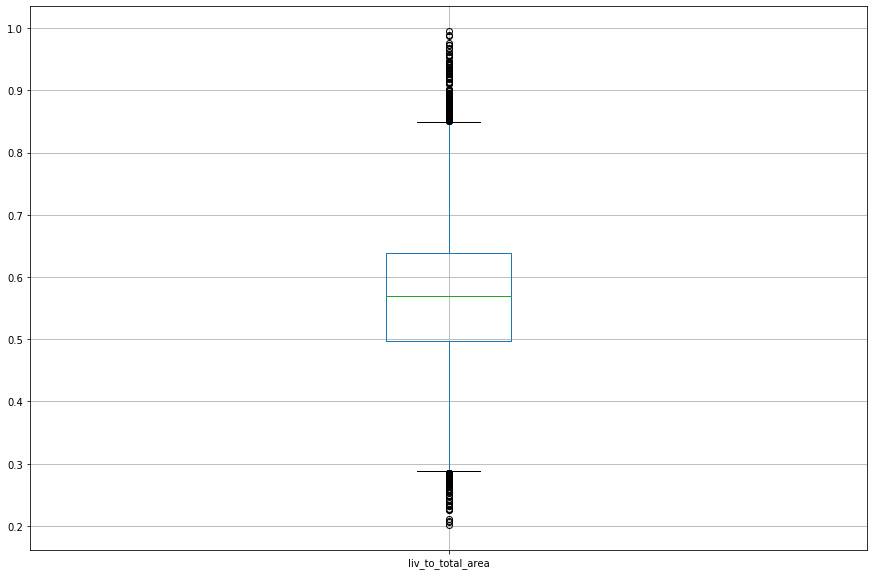

In [77]:
# посмотрим на срез
data.query('0.2 < liv_to_total_area < 1').boxplot('liv_to_total_area', figsize=(15, 10));

In [78]:
# Оставим значения более 0.28 и менее 0.85
data = data.query('0.28 <= liv_to_total_area <= 0.85')

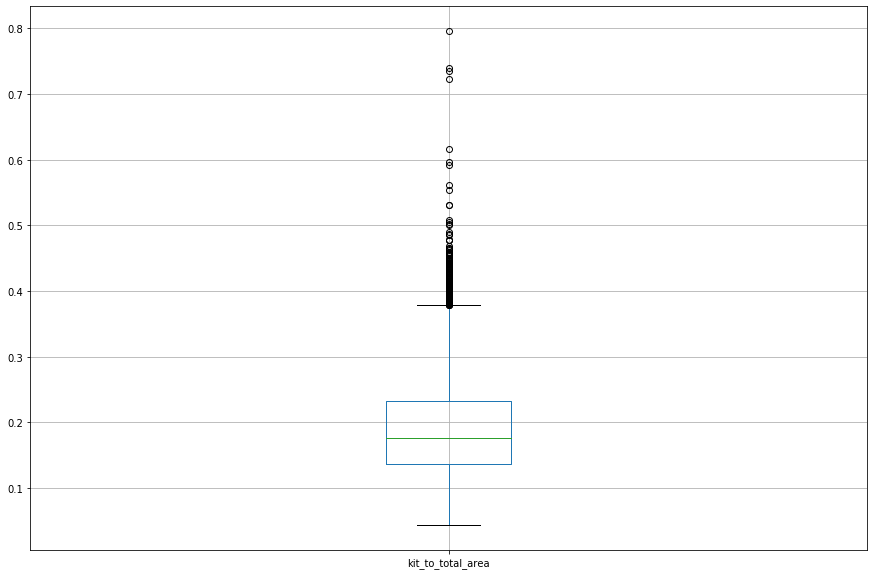

In [79]:
plot_box('kit_to_total_area')

In [80]:
# удалим выбросы выше 0,4
data = data.query('kit_to_total_area <= 0.4')

#### 4.4 Исследование факторов, влияющих на стоимость квартиры

In [81]:
data.corr().loc[:, 'last_price'].sort_values(ascending=False)

last_price             1.000000
price_sq_m             0.726890
total_area             0.698092
living_area            0.560018
kitchen_area           0.452707
rooms                  0.409525
ceiling_height         0.360656
ponds_around3000       0.181663
parks_around3000       0.170289
total_images           0.129189
floors_total           0.117675
floor                  0.094795
days_exposition        0.088245
parks_nearest          0.033834
is_apartment           0.009205
balcony               -0.008272
liv_to_total_area     -0.011348
year                  -0.020600
open_plan             -0.029965
studio                -0.039350
airports_nearest      -0.045545
ponds_nearest         -0.061045
kit_to_total_area     -0.257818
cityCenters_nearest   -0.319747
Name: last_price, dtype: float64

__Вывод:__ 
1. Цена квартиры имеет положительную корреляцию (с увеличением увеличивается цена) с количеством комнат, жилой площадью, что, в свою очередь влияет на цену за квадратный метр.
2. Цена имеет отрицательную корреляцию(с увеличением уменьшается) с удаленностью от центра города и площадью кухни.


_Отобразим на графике, как зависит цена от квадратного метра, числа комнат и удаленности от центра:_

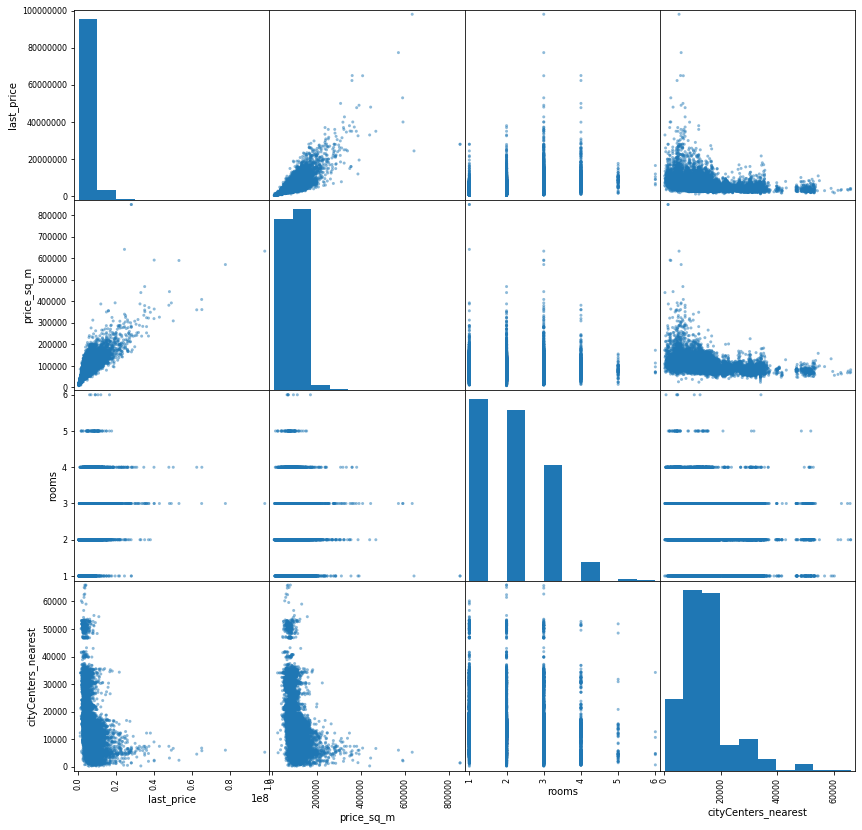

In [82]:
def func_scatter_matrix(data=data, *args):
    data_pr_cor = data[[*args]]
    pd.plotting.scatter_matrix(data_pr_cor, figsize=(14, 14));

func_scatter_matrix(data, 'last_price', 'price_sq_m', 'rooms', 'cityCenters_nearest')

Графики визуализируют ранее сделанные выводы.

__Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.__

In [83]:
data_price = data.pivot_table('last_price', 'floor_group', aggfunc='median')
data_price

,last_price
floor_group,
другой,4600000
первый,3830000
последний,4017500


Квартиры, не находящиеся на первом и последнем этажах, стоят дешевле. Рассчитаем процентное отношение стоимости к медианной цене квартиры на других этажах:

In [84]:
print('Квартиры на первом этаже на {:.1%} дешевле, чем квартиры на других этажах (кроме последнего).'.
      format((1 - data_price['last_price'][1]/data_price['last_price'][0]).round(2)))
print('Квартиры на последнем этаже на {:.1%} дешевле, чем квартиры на других этажах (кроме первого).'.
      format((1 - data_price['last_price'][2]/data_price['last_price'][0]).round(2)))

Квартиры на первом этаже на 17.0% дешевле, чем квартиры на других этажах (кроме последнего).
Квартиры на последнем этаже на 13.0% дешевле, чем квартиры на других этажах (кроме первого).


Квартиры на первом этаже дешевле, так как чаще не имеют балкона, а на последнем - так как есть вероятность возникновения проблем с крышей.

__Изучим зависимость от даты размещения: дня недели, месяца и года.__

In [85]:
# напишем функцию, которую вызовем для дня недели, месяца и года
def pivot_func(colname, aggf='mean', data=data):
    return data.pivot_table('last_price', colname, aggfunc=aggf)

In [86]:
# зависимость цены от дня недели
data_day_piv = pivot_func('day_of_week')
data_day_piv

,last_price
day_of_week,
Воскресенье,5.095525e+06
Вторник,5.257279e+06
Понедельник,5.167461e+06
Пятница,5.170716e+06
Среда,5.277583e+06
Суббота,5.202786e+06
Четверг,5.251156e+06


Средние цены по дням недели примерно одинаковы. Расположим значения сводной таблицы в порядке убывания:

In [87]:
data_day_piv.sort_values('last_price', ascending=False)

,last_price
day_of_week,
Среда,5.277583e+06
Вторник,5.257279e+06
Четверг,5.251156e+06
Суббота,5.202786e+06
Пятница,5.170716e+06
Понедельник,5.167461e+06
Воскресенье,5.095525e+06


Вывод: квартиры дороже в объявлениях, размещенных в середине недели (вторник, среда и четверг).

In [88]:
# зависимость цены от месяца
data_month_piv = pivot_func('month')
data_month_piv

,last_price
month,
Август,5.213630e+06
Апрель,5.261673e+06
Декабрь,5.274125e+06
Июль,5.150740e+06
Июнь,5.175519e+06
Май,5.062280e+06
Март,5.225987e+06
Ноябрь,5.200202e+06
Октябрь,5.189120e+06


Средние цены по месяцам также мало отличаются. Расположим значения сводной таблицы в порядке убывания:

In [89]:
data_month_piv.sort_values('last_price', ascending=False)

,last_price
month,
Сентябрь,5.294174e+06
Январь,5.280097e+06
Декабрь,5.274125e+06
Апрель,5.261673e+06
Март,5.225987e+06
Август,5.213630e+06
Февраль,5.206460e+06
Ноябрь,5.200202e+06
Октябрь,5.189120e+06


Вывод: квартиры дороже стоят в сентябре, декабре, январе и апреле. Самый бюджетный месяц для покупки квартиры - май.

In [90]:
# зависимость цены от года размещения
data_year_piv = pivot_func('year')
data_year_piv

,last_price
year,
2014,7.322663e+06
2015,5.846051e+06
2016,5.287382e+06
2017,5.121006e+06
2018,5.069878e+06
2019,5.524792e+06


В случае с годом размещения разница в ценах довольно существенна. Отсортируем таблицу:

In [91]:
data_year_piv.sort_values('last_price', ascending=False)

,last_price
year,
2014,7.322663e+06
2015,5.846051e+06
2019,5.524792e+06
2016,5.287382e+06
2017,5.121006e+06
2018,5.069878e+06


Вывод: самым затратным годом в плане покупки квартиры (также самым прибыльным в случае ее продажи)) был 2014 год. Самым удачным для покупки - 2018 г. 2019 г. на третьем месте, можно сделать предположение, что после четырех летнего снижения цены на квартиры, цены снова начинаю расти. Но подтвердить это можно будет только через несколько лет.

__Визуализируем полученные данные из сводных таблиц__

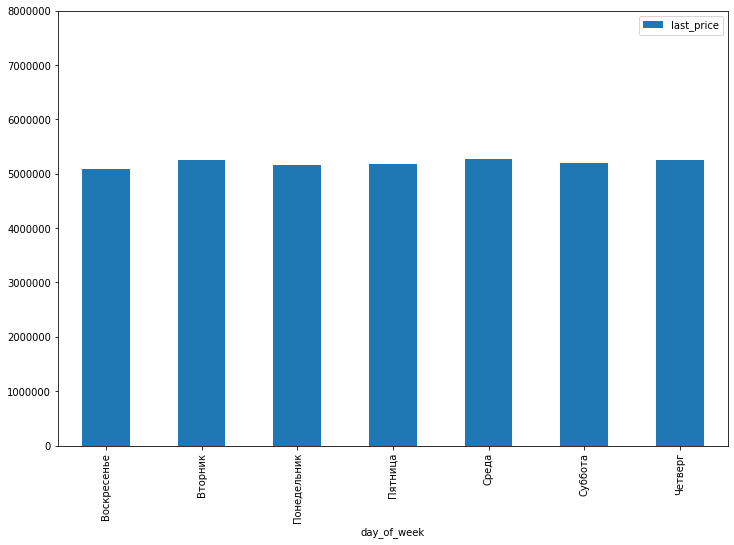

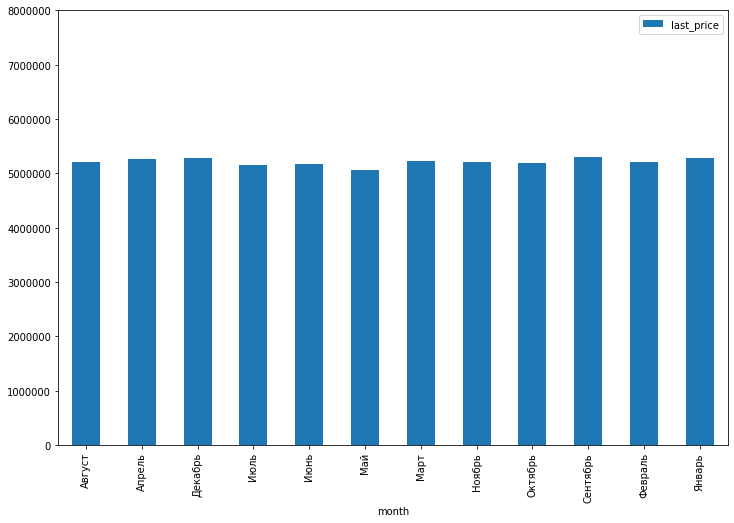

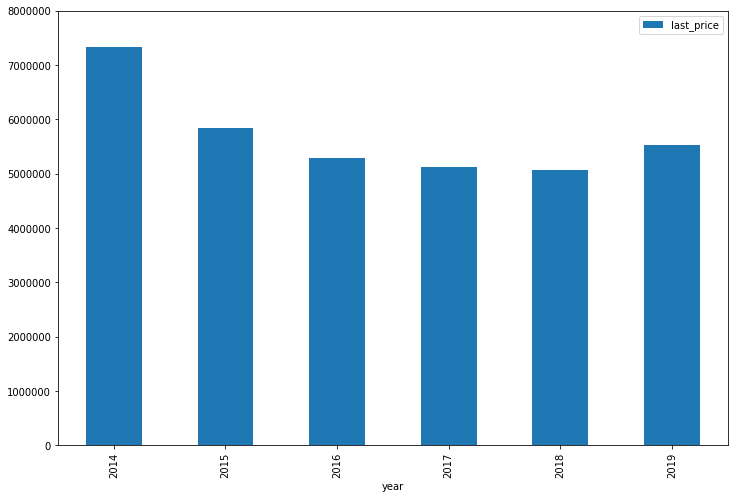

In [92]:
for i in (data_day_piv, data_month_piv, data_year_piv):
    i.plot(kind='bar', ylim=(0, 8000000), figsize=(12, 8));

#### 4.5 Расчет средней цены квадратного метра в 10 населённых пунктов с наибольшим числом объявлений

In [93]:
# создадим сводную таблицу и выберем 10 населенных пунктов с наибольшим количеством объявлений 
data_price_sq_m = data.pivot_table('price_sq_m', 'locality_name', aggfunc=['count', 'mean'])
data_price_sq_m.columns = ['count_price', 'mean_price']
data_top_10 = data_price_sq_m.sort_values('count_price', ascending=False)[:10]

In [94]:
data_top_10

,count_price,mean_price
locality_name,,
Санкт-Петербург,13500,109331.973050
посёлок Мурино,467,85205.907066
посёлок Шушары,413,78221.096102
Всеволожск,358,68527.403631
Пушкин,320,100869.249656
посёлок Парголово,316,89983.193165
Колпино,315,75249.386667
Гатчина,285,68669.300526
деревня Кудрово,264,93119.858485


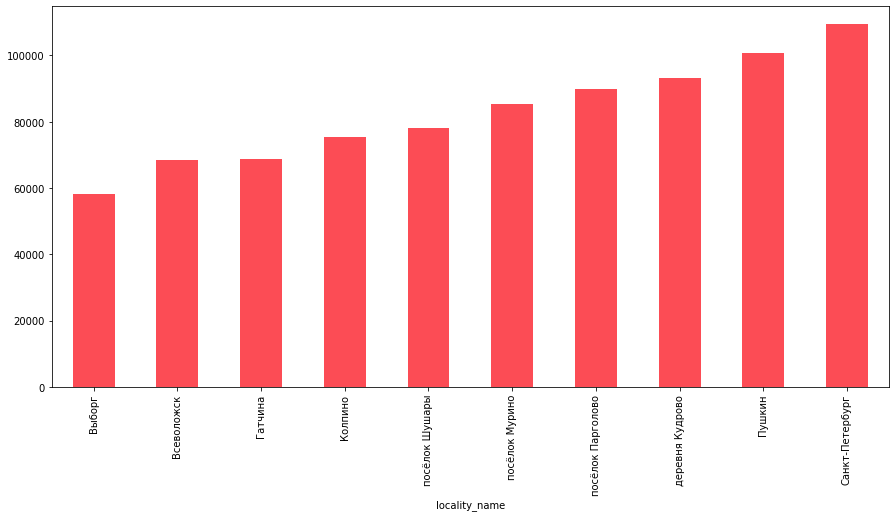

In [95]:
# посмотрим на распределение цен за квадратный метр
data_top_10.sort_values('mean_price', ascending=True)['mean_price'].plot(kind='bar', 
                                                                         figsize=(15, 7),facecolor='#FB000D', alpha=0.7);

In [96]:
print('Самое дорогое жилье расположено в городе {}'.format(data_top_10.idxmax()['mean_price']))
print('Самое дешевое жилье расположено в городе {}'.format(data_top_10.idxmin()['mean_price']))

Самое дорогое жилье расположено в городе Санкт-Петербург
Самое дешевое жилье расположено в городе Выборг


Вывод: самое дорогое жилье в Санкт-Петербурге, а также городах и деревнях, находящихся в пределах его территории или транспортной доступности для перемещения в центр города. Цена на жилье падает в зависимости от удаления от города, в Выборге самое дешевое жилье, правда он находится в двух часах езды от города на границе с Финляндией.

#### 4.6 Изучение предложения квартир.

Проанализируем информацию о расстоянии до центра для Санкт-Петербурга:

In [97]:
data_spb = data.query('locality_name == "Санкт-Петербург"')[['locality_name', 'cityCenters_nearest', 'last_price']]
data_spb.head(3)

,locality_name,cityCenters_nearest,last_price
2,Санкт-Петербург,13933.0,5196000
3,Санкт-Петербург,6800.0,64900000
9,Санкт-Петербург,15008.0,5400000


In [98]:
# удалим пропуски
data_spb = data_spb.dropna()

In [99]:
data_spb['cityCenters_nearest_km'] = (data_spb['cityCenters_nearest'] / 1000).round(0).astype(int)
data_spb.head(3)

,locality_name,cityCenters_nearest,last_price,cityCenters_nearest_km
2,Санкт-Петербург,13933.0,5196000,14
3,Санкт-Петербург,6800.0,64900000,7
9,Санкт-Петербург,15008.0,5400000,15


In [100]:
# посчитаем среднюю цену для каждого километра
data_spb_mean_km = data_spb.pivot_table('last_price', 'cityCenters_nearest_km', aggfunc='mean')
data_spb_mean_km

,last_price
cityCenters_nearest_km,
0,1.074800e+07
1,1.064274e+07
2,9.947414e+06
3,8.444937e+06
4,8.789260e+06
5,9.652927e+06
6,9.005177e+06
7,9.360933e+06
8,7.309368e+06


Построим столбчатую диаграмму:

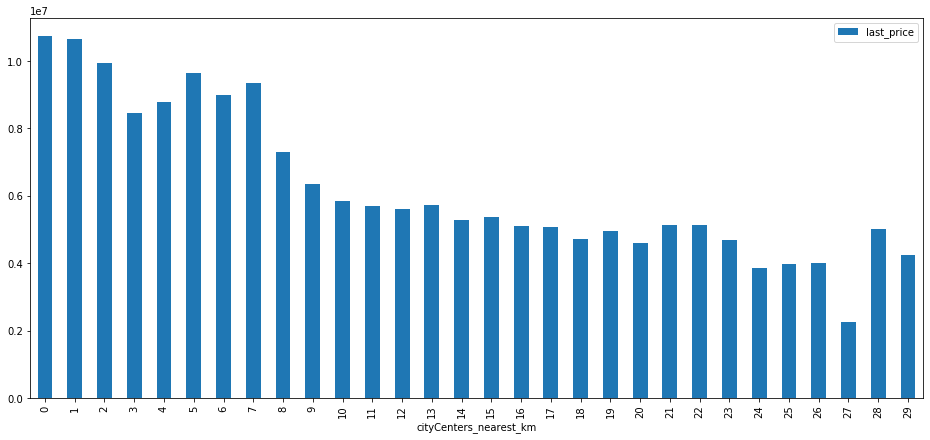

In [101]:
data_spb_mean_km.plot(kind='bar', figsize=(16, 7));

Вывод: центральная зона определяется по резкому изменению цены - примерно 8 км. от цента.

#### 4.7 Анализ квартир в центре.

In [102]:
# выделим сегмент квартир в центре и оставим следующие столбцы: площадь, цена, число комнат, высота потолков,
# этаж, удалённость от центра, дата размещения объявления
data_center = data.query('(cityCenters_nearest <= 8000) and (locality_name == "Санкт-Петербург")')[['last_price', 
                                                                                                    'total_area', 
                                                                                                    'rooms', 
                                                                                                    'ceiling_height', 
                                                                                                    'floor', 
                                                                                                    'cityCenters_nearest', 
                                                                                                    'day_of_week', 
                                                                                                    'month', 
                                                                                                    'year']]
data_center.head()

,last_price,total_area,rooms,ceiling_height,floor,cityCenters_nearest,day_of_week,month,year
3,64900000,159.0,3,2.65,9,6800.0,Пятница,Июль,2015
63,20000000,118.0,3,3.00,7,4800.0,Вторник,Сентябрь,2018
94,3500000,29.5,1,2.50,2,7303.0,Пятница,Апрель,2019
99,9600000,90.0,4,2.65,2,2818.0,Вторник,Сентябрь,2017
111,4590000,40.0,1,2.65,1,6175.0,Понедельник,Май,2017


Построим гистограммы для площади, цены, числа комнат, высоты потолков:

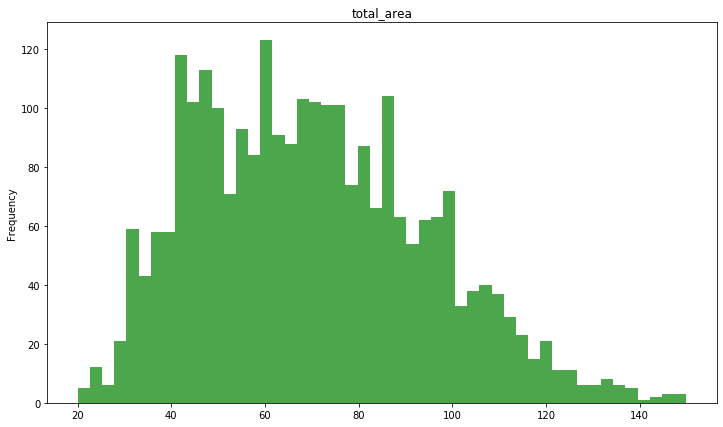

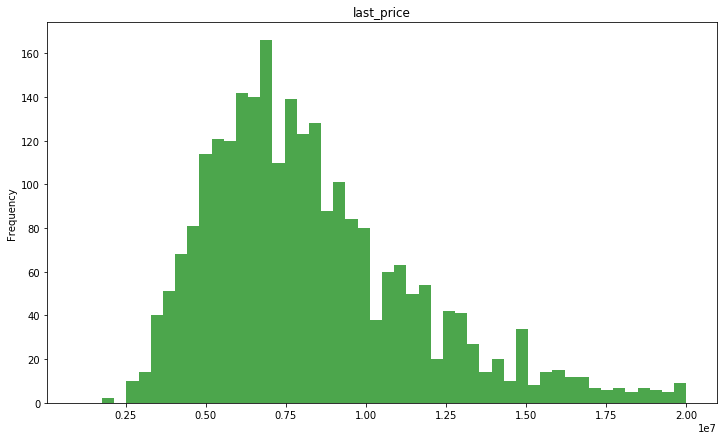

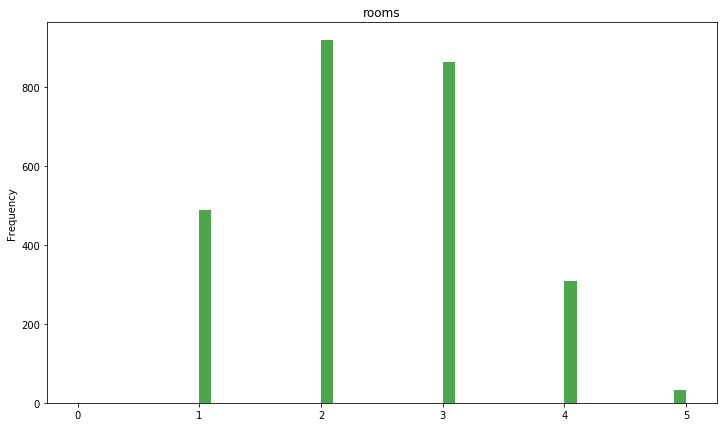

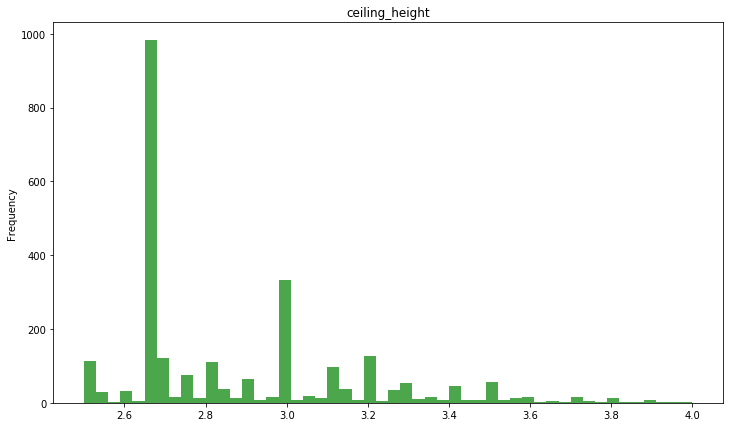

In [103]:
for i in zip(('total_area', 'last_price', 'rooms', 'ceiling_height'), ((20, 150), (10**6, 2*10**7), (0, 5), (2.5, 4))):
    data_center[i[0]].plot(kind='hist', title=i[0], bins=50, figsize=(12, 7), range=i[1], facecolor='g', alpha=0.7)
    plt.show()

Сравним графики с графиками из 4.2 и на основании этого сделаем следующие выводы, что квартиры в центре в общем:
1. Имеют большую площадь (от 45 до 100 кв.м.).
2. Имеют потолки выше (от 2,6 до 3,2 м.).
3. Стоят дороже (от 4 до 12,5 млн. руб).

Количество комнат, при этом, примерно такое же, только комнаты больше, а квадрат стоит дороже.

__Проанализируем влияние на стоимость квартиры числа комнат, этажа, удалённости от центра, даты размещения объявления__

In [104]:
data_center.corr().loc[:, 'last_price'].sort_values(ascending=False)

last_price             1.000000
total_area             0.620921
rooms                  0.307332
floor                  0.158272
ceiling_height         0.106303
year                  -0.015512
cityCenters_nearest   -0.049792
Name: last_price, dtype: float64

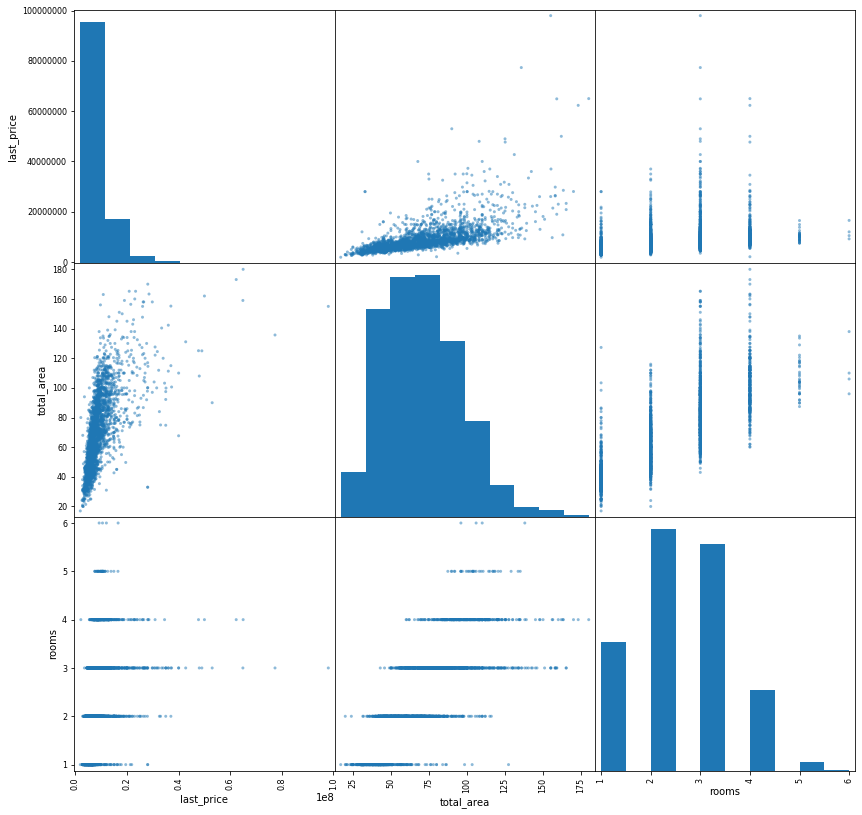

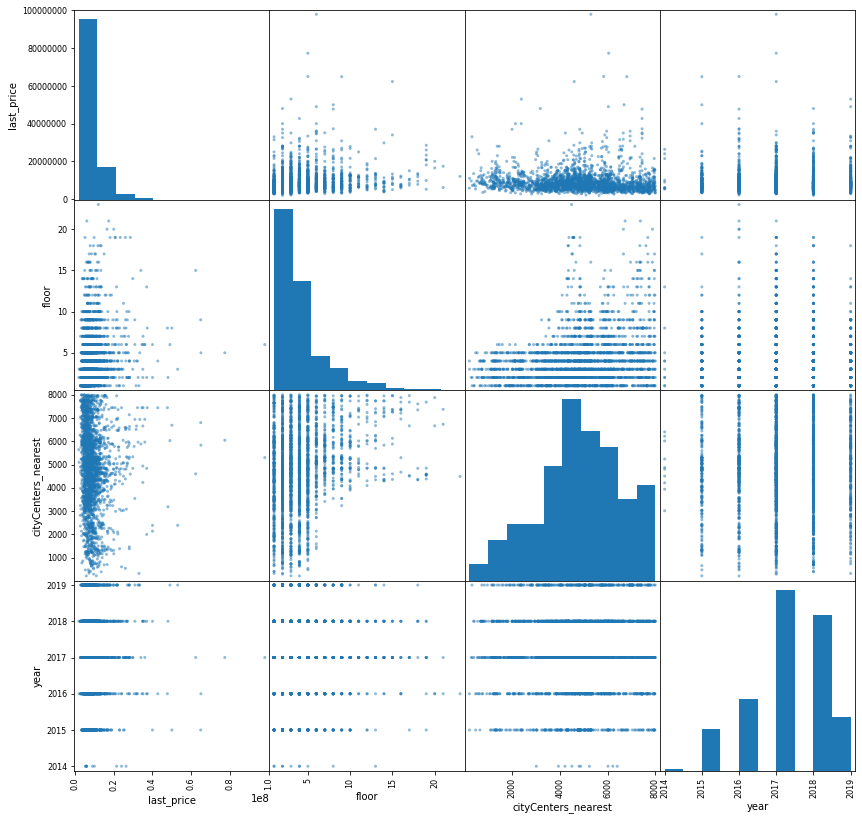

In [105]:
# Отобразим эти зависимости в графическом виде
func_scatter_matrix(data_center, 'last_price', 'total_area', 'rooms')
func_scatter_matrix(data_center, 'last_price', 'floor', 'cityCenters_nearest', 'year')

Посмотрим зависимости от даты размещения. Создадим необходимые сводные таблицы.

In [106]:
data_center_day_piv = pivot_func('day_of_week', data=data_center)
data_center_month_piv = pivot_func('month', data=data_center)
data_center_year_piv = pivot_func('year', data=data_center)

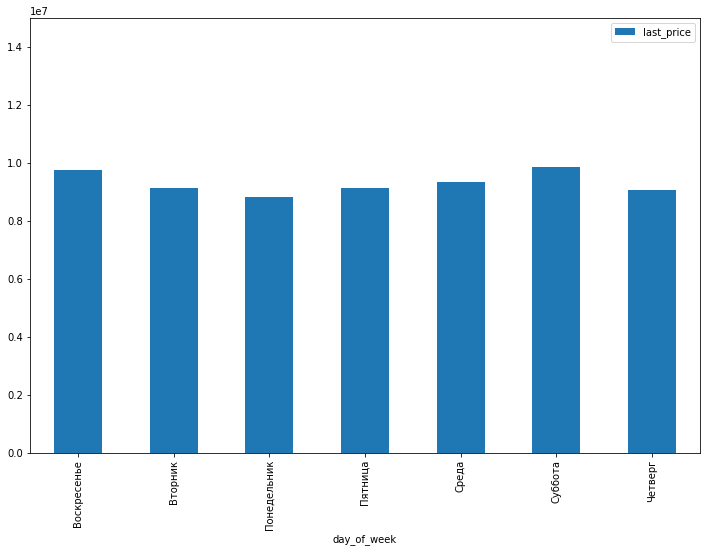

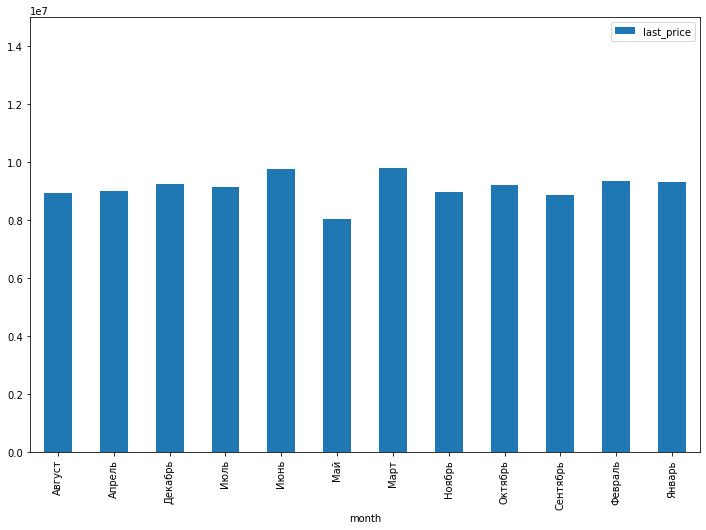

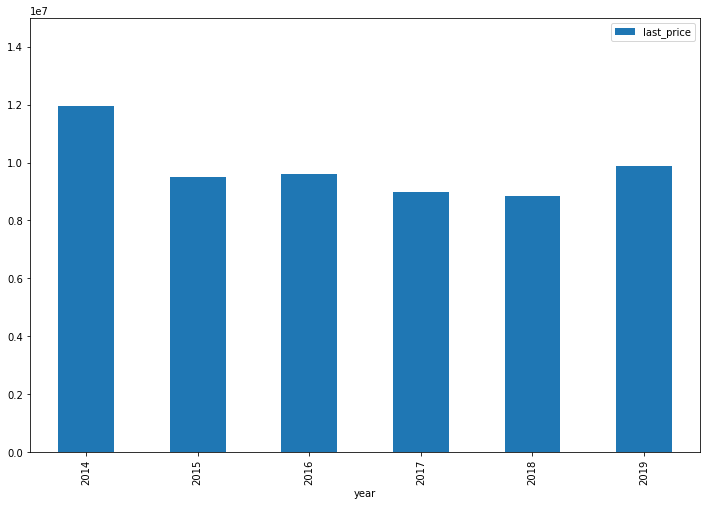

In [107]:
# построим гистограммы
for i in (data_center_day_piv, data_center_month_piv, data_center_year_piv):
    i.plot(kind='bar', ylim=(0, 15000000), figsize=(12, 8));

Вывод: 
1. На цену квартир в центре очень сильно влияют общая площадь и количество комнат, впрочем, как и в любом районе.
2. Квартиры в центре были самыми дорогими в 2014 году, самыми дешевыми в 2018.
3. Самые дорогие объявления о продаже квартир размещают в марте, дешевые в мае (как и всех остальных квартир).

### Шаг 5. Общий вывод

В проекте был исследован архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Для проведения анализа была произведена их предварительная обработка, а именно:
- выбран правильный разделитель при загрузке файла;
- произведо заполнение пропусков в тех данных, для которых это было возможно;
- к исходным данным были добавлены дополнительные столбцы с параметрами для дальнейшего анализа;
- проанализированы аномальные значения и выбросы;
- проведен анализ предобработаных и дополненых данных в соответствии с заданием проекта.

По итогу работы можно заключить, что квартиры по медиане имеют:
1. площадь от 35 до 60 кв.м.
2. стоимость от 2 до 6 млн.руб.
3. количество комнат от 1 до 3.
4. высоту потолков от 2,5 до 2,7 м.

Проанализировано время продажи и сделан вывод, что продажа прошла необычно долго, если длилась более 1200 дней, а быстро - менее 30 дней.

Выявлено, что квартиры на первом и последнем этажах стоят дешевле.

Самым затратным годом в плане покупки квартиры (также самым прибыльным в случае ее продажи) был 2014 год. Самым удачным для покупки - 2018 г.

Самое дорогое жилье в Санкт-Петербурге, а также городах и деревнях, находящихся в пределах его территории или транспортной доступности для перемещения в центр города.

Были проанализированы цены и влияния на них в центральной зоне Санкт-Петербурга (зона в пределах 8 км. от центра города). Сделаны следующие выводы, что квартиры в центре:
1. имеют большую площадь (от 45 до 100 кв.м.).
2. имеют потолки выше (от 2,6 до 3,2 м.).
3. стоят дороже (от 4 до 12,5 млн. руб).

На цену квартир в центре очень сильно влияют общая площадь и количество комнат, впрочем, как и в любом районе.

Квартиры в центре были самыми дорогими в 2014 году, самыми дешевыми в 2018.

Самые дорогие объявления о продаже квартир размещают в марте, дешевые в мае (как и всех остальных квартир).

Полученый анализ можно использовать как для прогнозирования цен на квартиры для каждого района, так и для рекомендаций к покупке на основе некоторых входных параметров.